## PROBLEM STATEMENT-
perform Linear Regression for 50_Startups 


In [1]:
## Importing Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [4]:
## Reading the data

In [5]:
strt50 = pd.read_csv("E:\\deeksha\\python\\data\\50_Startups.csv")

In [12]:
## Checking features in the data

In [6]:
strt50.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
## Renaming features

In [35]:
strt50.rename(columns={'RnD_Spend': 'R&D Spend',  'Marketing_Spend': 'Marketing Spend'}, inplace=True)

In [15]:
## Checking 1st five rows

In [36]:
strt50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
# Checking dimensions

In [7]:
strt50.shape

(50, 5)

In [8]:
strt50.size

250

In [17]:
# Checking Null values in the data

In [37]:
strt50.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [18]:
# Checking duplicate values in the data

In [11]:
strt50.duplicated().sum()

0

In [21]:
# Checking how many city are in state
strt50.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [38]:
strt50.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [19]:
# Checking Correlation between features

In [39]:
strt50.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Performing EDA on DATA

array([[<AxesSubplot:title={'center':'RnD_Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing_Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

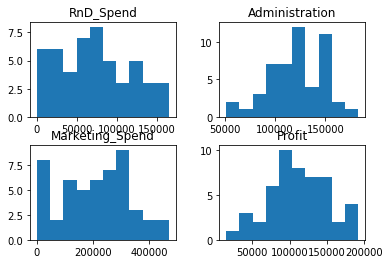

In [22]:
# Histogram
strt50.hist(grid = False)

<AxesSubplot:>

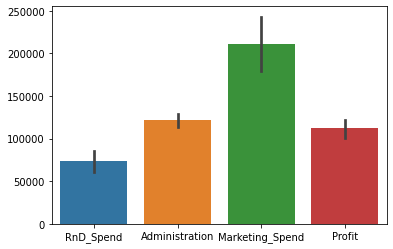

In [23]:
# Barplot
sns.barplot(strt50)

<AxesSubplot:>

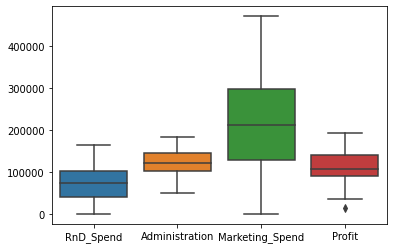

In [24]:
# Boxplot
sns.boxplot(data = strt50 )

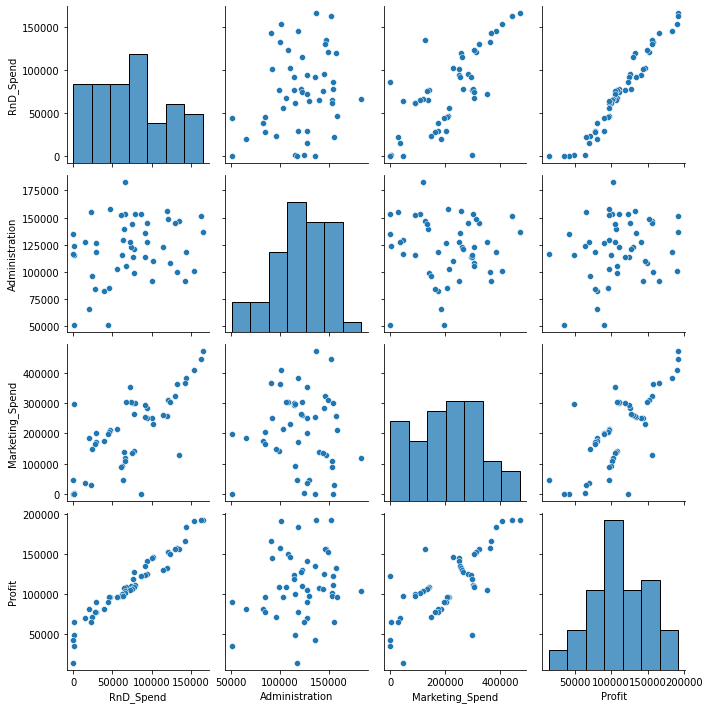

In [25]:
# Pairplot
sns.pairplot(strt50)

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

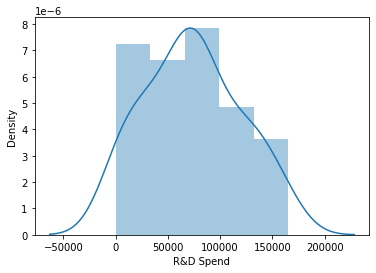

In [40]:
sns.distplot(strt50["R&D Spend"] , hist= True)

<AxesSubplot:xlabel='Administration', ylabel='Density'>

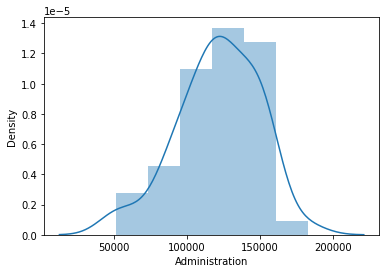

In [31]:
sns.distplot(strt50["Administration"] , hist= True)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

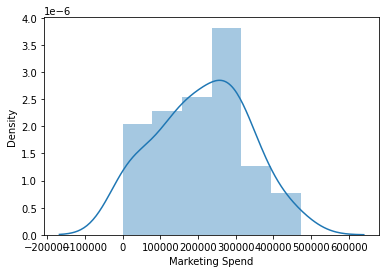

In [41]:
sns.distplot(strt50["Marketing Spend"] , hist= True)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

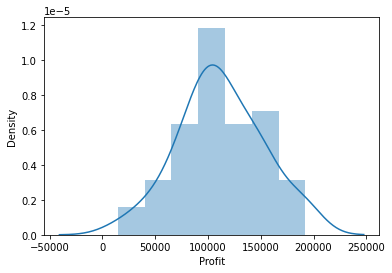

In [34]:
sns.distplot(strt50["Profit"] , hist= True)

## Building Model

In [48]:
# spliting Dataset in Dependent & Independent Variables
X = strt50.iloc[:, :-1]
y = strt50.iloc[:, 4]

In [49]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [50]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [51]:
X.shape , y.shape

((50, 4), (50,))

In [55]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

In [54]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [24]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [68]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [69]:
# Dividing the data into Training data and Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state = 0)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=110)

In [71]:
X_train.shape , X_test.shape

((40, 5), (10, 5))

In [72]:
y_train.shape , y_test.shape

((40,), (10,))

In [73]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [74]:
X_train

array([[-0.00973933,  0.09876642,  0.66728656,  1.62368828, -0.73379939],
       [-1.53989921,  0.53916192, -1.71205357, -0.61588176, -0.73379939],
       [ 0.54193214, -0.98068752,  0.24702819, -0.61588176, -0.73379939],
       [ 1.44562932, -0.04441592,  1.29389545, -0.61588176,  1.36277029],
       [ 1.15458227,  0.89105354,  0.828546  ,  1.62368828, -0.73379939],
       [-1.1215643 , -1.88078615, -0.25877069, -0.61588176,  1.36277029],
       [-1.51921509,  0.14649352, -1.69711849, -0.61588176,  1.36277029],
       [ 1.39878913, -0.99457909,  1.16029688,  1.62368828, -0.73379939],
       [-1.05101999, -0.82746998, -0.55108219, -0.61588176, -0.73379939],
       [ 0.03698154, -0.21175804,  0.63077279, -0.61588176, -0.73379939],
       [-0.1832201 ,  1.15234765, -0.87162343, -0.61588176,  1.36277029],
       [-1.52868996, -2.37553759, -1.71205357, -0.61588176,  1.36277029],
       [-0.74253403, -1.28748762, -0.33929914, -0.61588176, -0.73379939],
       [-1.21925069,  0.25896841, -1.4

In [75]:
X_test

array([[ 0.24720457,  1.16913741, -1.71205357, -0.61588176,  1.36277029],
       [-0.96309157, -1.22727782, -0.42188901,  1.62368828, -0.73379939],
       [ 0.94044981,  1.27478738,  0.3001216 ,  1.62368828, -0.73379939],
       [ 0.40114274,  0.25681174,  0.24777254,  1.62368828, -0.73379939],
       [-0.27563821,  1.1408489 , -1.02003957, -0.61588176,  1.36277029],
       [ 0.35741438, -0.20101336,  0.60139651,  1.62368828, -0.73379939],
       [-0.9471511 ,  0.24761072, -0.13434593,  1.62368828, -0.73379939],
       [-0.94527817, -0.04879753, -0.35658517, -0.61588176, -0.73379939],
       [ 0.36244422,  0.54153558,  0.26993665, -0.61588176, -0.73379939],
       [ 0.05332134, -0.71978595, -0.60933663, -0.61588176,  1.36277029]])

## Multi Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [77]:
# Predicting the output depend on the train data
y_pred_train = model.predict(X_train)
y_pred_train

array([113641.09499818,  44791.26588906, 135584.06471955, 174472.81745032,
       160060.56220969,  68622.60578351,  46442.84182367, 172638.12671676,
        69170.87857488, 115754.63475297, 101533.07880969,  48413.9321972 ,
        82612.44289331,  59154.68987497, 135453.04718426, 116634.83312585,
        88749.15657152, 113538.67335168,  53457.51739639, 182695.47638764,
        98940.8771489 , 155116.09796247, 189525.5974121 , 108880.10401026,
       110063.9045882 , 100723.00645882,  96868.5829009 , 130009.07332499,
        98660.51103265, 164257.10530347, 152036.02436724,  87505.71596504,
       159030.89672675,  63206.46441351, 116151.36117126,  46462.86577147,
       101518.76614347, 146737.55974057,  89847.96475372, 193345.93009312])

In [78]:
# training accuracy percentage
training_accuracy = model.score(X_train, y_train)


In [79]:
training_accuracy

0.9592402440052763

In [80]:
# Predicting the output depend on the test data
y_pred_test = model.predict (X_test)
y_pred_test

array([116259.74870782,  73409.11984887, 149526.58852575, 128710.68972163,
        97393.50497263, 128451.29929338,  73508.55485044,  73253.99079578,
       127009.23817921, 113582.37342892])

In [81]:
# testing accuracy percentge
testing_accuracy = model.score(X_test, y_test)

In [82]:
testing_accuracy

0.8151840927625962

In [89]:
# Comparing the predicted values and actual values
df = pd.DataFrame({'Predicted value':y_pred_test,'Actual Value':y_test})
df

,Predicted value,Actual Value
19,116259.748708,122776.86
41,73409.119849,77798.83
14,149526.588526,132602.65
12,128710.689722,141585.52
31,97393.504973,97483.56
18,128451.299293,124266.90
36,73508.554850,90708.19
40,73253.990796,78239.91
13,127009.238179,134307.35
24,113582.373429,108552.04


In [90]:
# R Squared score
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred_test, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 86.1878611548447


## MIN MAX Scaler

In [42]:
## importing MinMaxScaler

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [94]:
scaler.fit_transform(X)

array([[1.        , 0.65174393, 1.        , 0.        , 1.        ],
       [0.98335946, 0.76197173, 0.94089337, 0.        , 0.        ],
       [0.92798459, 0.37957895, 0.8646636 , 1.        , 0.        ],
       [0.87313643, 0.51299839, 0.81223513, 0.        , 1.        ],
       [0.85943772, 0.30532804, 0.77613557, 1.        , 0.        ],
       [0.797566  , 0.3694479 , 0.76912588, 0.        , 1.        ],
       [0.81412828, 0.73016111, 0.27071031, 0.        , 0.        ],
       [0.7880179 , 0.71745725, 0.68649342, 1.        , 0.        ],
       [0.72901786, 0.74173276, 0.66049977, 0.        , 1.        ],
       [0.74590551, 0.43692884, 0.64644319, 0.        , 0.        ],
       [0.61635061, 0.45150637, 0.48573267, 1.        , 0.        ],
       [0.60884455, 0.30836422, 0.52936195, 0.        , 0.        ],
       [0.56766982, 0.57883556, 0.52956308, 1.        , 0.        ],
       [0.55635219, 0.64106561, 0.53555202, 0.        , 0.        ],
       [0.72539353, 0.8013272 , 0.

In [48]:
# Building Model

In [96]:
model_lr2 = LinearRegression()

In [49]:
## Fitting train data in the Model

In [98]:
model_lr2.fit(X_train ,y_train)

LinearRegression()

In [100]:
## Checking Intercept 

In [99]:
model_lr2.intercept_

112307.75375

In [102]:
ypred_test2 = model_lr2.predict(X_test)

In [54]:
ypred_train2 = model_lr2.predict(Scaled_X_train)

In [55]:
from sklearn.metrics import r2_score

In [105]:
scaled_R2_train = r2_score(y_train,y_pred_train)

In [107]:
scaled_R2_test = r2_score(y_test, ypred_test2)

In [111]:
print(scaled_R2_train ,scaled_R2_test )

0.9592402440052763 0.8151840927625962


In [112]:
ypred_test2

array([116259.74870782,  73409.11984887, 149526.58852575, 128710.68972163,
        97393.50497263, 128451.29929338,  73508.55485044,  73253.99079578,
       127009.23817921, 113582.37342892])

In [114]:
y_pred_test

array([116259.74870782,  73409.11984887, 149526.58852575, 128710.68972163,
        97393.50497263, 128451.29929338,  73508.55485044,  73253.99079578,
       127009.23817921, 113582.37342892])